In [1]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as ctrl

In [2]:
temperature = ctrl.Antecedent(np.arange(20, 81, 1), 'temperature')
smoke = ctrl.Antecedent(np.arange(0, 1001, 1), 'smoke')
fire = ctrl.Antecedent(np.arange(0, 1001, 1), 'fire')
pump_speed = ctrl.Consequent(np.arange(0, 241, 1), 'pump_speed')

**Define Temperature**

c:\Users\ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


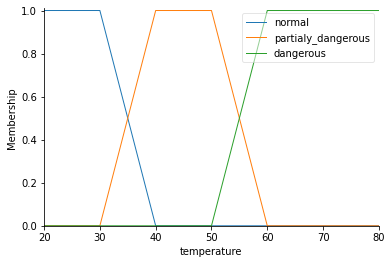

In [3]:
temperature['normal'] = skf.trapmf(temperature.universe, [20, 20, 30, 40])
temperature['partialy_dangerous'] = skf.trapmf(temperature.universe, [30, 40, 50, 60])
temperature['dangerous'] = skf.trapmf(temperature.universe, [50, 60, 80, 80])

temperature.view()

**Define Smoke**

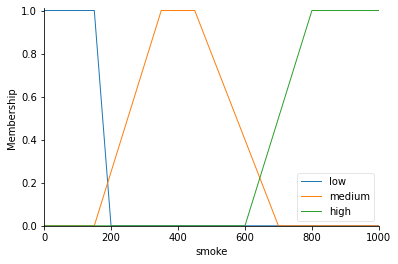

In [4]:
smoke['low'] = skf.trapmf(smoke.universe, [0, 0, 150, 200])
smoke['medium'] = skf.trapmf(smoke.universe, [150, 350, 450, 700])
smoke['high'] = skf.trapmf(smoke.universe, [600, 800, 1000, 1000])

smoke.view()

**Define Fire**

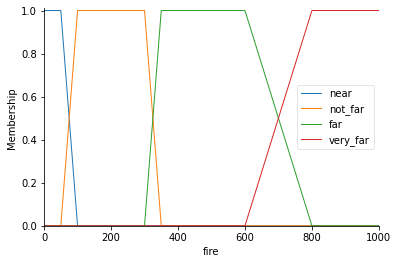

In [5]:
fire['near'] = skf.trapmf(fire.universe, [0, 0, 50, 100])
fire['not_far'] = skf.trapmf(fire.universe, [50, 100, 300, 350])
fire['far'] = skf.trapmf(fire.universe, [300, 350, 600,800])
fire['very_far'] = skf.trapmf(fire.universe, [600, 800, 1000, 1000])

fire.view()

**Define Pump Speed**

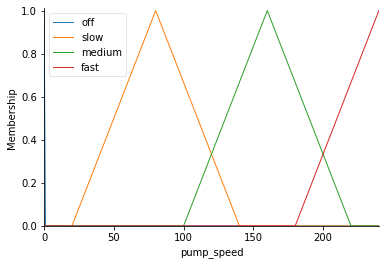

In [6]:
pump_speed['off'] = skf.trimf(pump_speed.universe, [0, 0, 0])
pump_speed['slow'] = skf.trimf(pump_speed.universe, [20, 80, 140])
pump_speed['medium'] = skf.trimf(pump_speed.universe, [100, 160, 220])
pump_speed['fast'] = skf.trapmf(pump_speed.universe, [180, 240, 240, 240])

pump_speed.view()

**Define Rules**

In [7]:
rules = [
    # temperature dangerous
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['very_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature partialy dangerous
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature medium
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['near'], pump_speed['medium'])
]

**Membership Value**

In [8]:
def inferences(storage=[], temp=0, smk=0, fr=0):
    temperature_inf = storage.copy()
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['partialy_dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['normal'].mf, temp))

    smoke_inf = storage.copy()
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['low'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['medium'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['high'].mf, smk))

    fire_inf = storage.copy()
    fire_inf.append(skf.interp_membership(fire.universe, fire['very_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['not_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['near'].mf, fr))

    return [temperature_inf, smoke_inf, fire_inf]

**Find z value**

In [9]:
def z_slow(a_pred):
    z1 = (a_pred * (80-20)) + 20
    z2 = 140 - (a_pred*(140-80))
    return z1, z2

def z_medium(a_pred):
    z1 = (a_pred * (160-100)) + 100
    z2 = 220 - (a_pred*(220-160))
    return z1, z2

def z_fast(a_pred):
    z1 = (a_pred * (240-180)) + 180
    return z1

**Define Input**

In [10]:
input_temperature = 40
input_fire = 700
input_smoke = 50

**Tsukamoto Method**

In [11]:
from itertools import product

inference = inferences(temp=input_temperature, smk=input_smoke, fr=input_fire)

rule_inferences = [list(combination) for combination in product(*inference)]

a_val = []
z_val = []
for idx, ri in enumerate(rule_inferences):
    a_pred = min(ri)
    if a_pred > 0:
        if 'pump_speed[off]' in str(rules[idx].consequent):
            a_val.append(a_pred*2)
            z_val.append(0)
        if 'pump_speed[slow]' in str(rules[idx].consequent):
            a_val.append(a_pred*2)
            z1, z2 = z_slow(a_pred)
            z_val.append(z1*a_pred)
            z_val.append(z2*a_pred)
        if 'pump_speed[medium]' in str(rules[idx].consequent):
            a_val.append(a_pred*2)
            z1, z2 = z_medium(a_pred)
            z_val.append(z1*a_pred)
            z_val.append(z2*a_pred)
        if 'pump_speed[fast]' in str(rules[idx].consequent):
            a_val.append(a_pred)
            z1 = z_fast(a_pred)
            z_val.append(z1*a_pred)

output_action = sum(z_val)/sum(a_val)
print(f'Water Pump Speed Output: {output_action} m/s')

Water Pump Speed Output: 40.0 m/s


**Visualization**

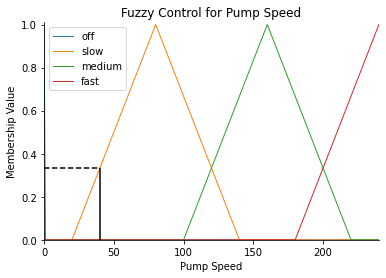

In [12]:
import matplotlib.pyplot as plt

pump_speed.view()

m_value = skf.interp_membership(pump_speed.universe, pump_speed['medium'].mf, output_action)
m_value1 = skf.interp_membership(pump_speed.universe, pump_speed['slow'].mf, output_action)
m_value2 = skf.interp_membership(pump_speed.universe, pump_speed['fast'].mf, output_action)
m = max(m_value, m_value1, m_value2)
plt.vlines(output_action, 0, m, colors='black')
plt.hlines(m, 0, output_action, colors='black', linestyles='dashed')

plt.xlabel("Pump Speed")
plt.ylabel("Membership Value")
plt.title("Fuzzy Control for Pump Speed")
plt.legend()

# Show the plot:
plt.show()
